In [1]:
import matplotlib.pyplot as plt
import sys

sys.path.append('../../')
import busi.air.saturated_vapor_pressure as svp

# Various Functions

## Introduction

This document summerize the caluculation of saturated vapor pressure.

The functions depending on the calculation below are represented in this document.  
- SONNTAG(ZIS Z8806,1995)
- WMO (Goff, 1957)
- Wexler-Hyland (1983)
- Tetens(1930)
- Briggs and Sacket(1989)
- Antoine
- Goff Gratch

## SONNTAG (JIS Z8806, 1995)

↑　1990？

$$
k = \frac{a_1}{T} + a_2 + a_3 \times T + a_4 \times T^2 + a_5 \times \log_e(T)
$$

$$
P_{vs} = e^k
$$

$$
\frac{dP_{vs}}{dT} = e^k \times \left( - \frac{a_1}{T^2} + a_3 + 2 \times a_4 \times T + \frac{a_5}{T} \right)
$$

Where  
$ T $ is the absolute temperature (K);   
$ P_{vs} $ is the saturated vapor pressure (Pa).

| | $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ |
| :---: | :---: | :---: | :---: | :---: | :---: |
| water | -6096.9385 | 21.2409642 | -0.02711193 | 0.00001673952 | 2.433502 |
| ice | -6024.5282 | 29.32707 | 0.010613863 | -0.000013198825 | -0.49382577 |

### Error

The error is not more than 0.5 % in $ -100 \le \theta \le -50 $.  
The error is not more than 0.3 % in $ -50 \le \theta \le 0 $.  
The error is not more than 0.005 % in $ 0 \le \theta \le 100 $.  
$\theta$ is the temperature (degree C).

↑ JIS に誤差が記述？（未確認）

### Reference

- D. Sonntag, Important new values of the physical constants of 1986, vapor pressure formulations based on the ITS-90, and psychrometer formulae, Z. Meteorol. 70(1990) pp.340-344.

↑ 未確認

### Example 1

Saturated vapor pressure of 0 degree C.

In [2]:
svp._saturated_vapor_pressure_SONNTAG('ice', 273.15)

(611.1527097518417, 50.323158101166285)

In [3]:
svp._saturated_vapor_pressure_SONNTAG('water',273.15)

(611.2128400464351, 44.409707361678436)

Saturated vapor pressure of 100 degree C.

In [4]:
svp._saturated_vapor_pressure_SONNTAG('water', 373.15)

(101419.04173564097, 3619.570359998814)

### Example 2

$$
\frac{dP}{dT} \bigg|_{t=273.15} \simeq \frac{P\mid_{t=274.15}-P \mid_{t=273.15}}{(274.15-273.15)}
$$

In [5]:
value0 = svp._saturated_vapor_pressure_SONNTAG('water', 273.15)
value1 = svp._saturated_vapor_pressure_SONNTAG('water', 274.15)
(value0[1], (value1[0] - value0[0])/1.0)

(44.409707361678436, 45.8672935329588)

### Example 3

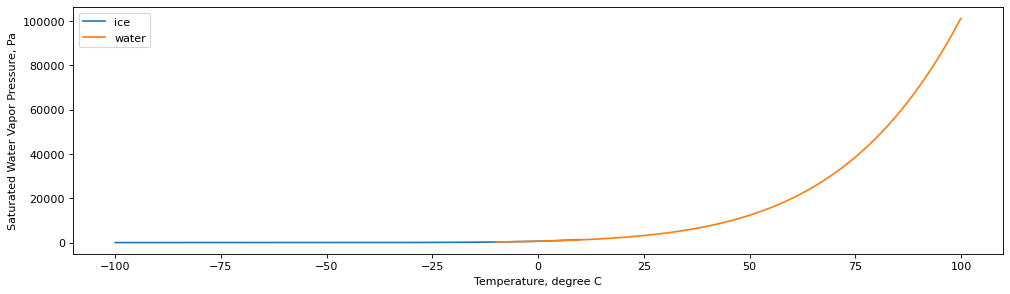

In [6]:
theta_ice   = [0.1 * x for x in range(-1000, 100)]
theta_water = [0.1 * x for x in range( -100,1000)]

plt.figure(figsize=(15, 4), dpi=80)
svp_ice = [svp._saturated_vapor_pressure_SONNTAG('ice', t+273.15)[0] for t in theta_ice]
svp_water = [svp._saturated_vapor_pressure_SONNTAG('water',t+273.15)[0] for t in theta_water]
plt.plot(theta_ice, svp_ice, label='ice')
plt.plot(theta_water, svp_water, label='water')
plt.legend()
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure, Pa')
plt.show()

### Example 4

Comparison of the differential value calculated by numerical method and mathematical method.

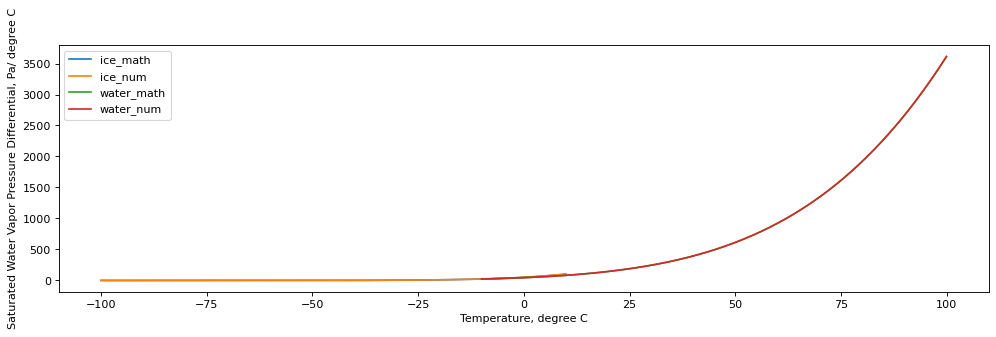

In [7]:
theta_ice = [0.1 * x for x in range(-1000, 100)]
theta_water = [0.1 * x for x in range(-100,1000)]

plt.figure(figsize=(15, 4), dpi=80)
dsvp_dt_ice = [svp._saturated_vapor_pressure_SONNTAG('ice', t+273.15)[1] for t in theta_ice]
dsvp_dt_ice_div = [(svp._saturated_vapor_pressure_SONNTAG('ice', t+273.25)[0] - svp._saturated_vapor_pressure_SONNTAG('ice', t+273.15)[0])/0.1 for t in theta_ice]
dsvp_dt_water = [svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[1] for t in theta_water ]
dsvp_dt_water_div = [(svp._saturated_vapor_pressure_SONNTAG('water', t+273.25)[0] - svp._saturated_vapor_pressure_SONNTAG('water',t+273.15)[0])/0.1 for t in theta_water]

plt.plot(theta_ice, dsvp_dt_ice, label='ice_math')
plt.plot(theta_ice, dsvp_dt_ice_div, label='ice_num')
plt.plot(theta_water, dsvp_dt_water, label='water_math')
plt.plot(theta_water, dsvp_dt_water_div, label='water_num')
plt.legend()
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure Differential, Pa/ degree C')
plt.show()

The clear differece could not be shown.

## WMO (Goff, 1957)

$$
\begin{array}{}
    ew &= 2.78614 + 10.79574 \times \left( 1.0 - \frac{273.16}{T} \right) \\
    & - 5.028 \times \log_{10} \left( \frac{T}{273.16} \right) \\
    & + 1.50475 \times 10^{-4} \times \left( 1.0 - 10.0^{ -8.2969 \times \left( \frac{T}{273.16} - 1.0 \right) } \right) \\
    & + 0.42873 \times 10^{-3} \times \left( 10^{4.76955 \times \left( 1.0 - \frac{273.16}{T} \right) } - 1.0 \right)
\end{array}
$$

$$
P_{vs} = 10^{ew}
$$

$$
\begin{array}{}
\frac{dew}{dT} &= 10.79574 \times \frac{273.16}{T^2} \\
& - \frac{5.028}{\log 10} \times \frac{1}{T} \\
& + 1.50475 \times 10^{-4} \times \frac{8.2969}{273.16} \times \log 10 \times 10.0^{ -8.2969 \times \left( \frac{T}{273.16} - 1.0 \right) } \\
& + 0.42873 \times 10^{-3} \times 4.76955 \times \frac{273.16}{T^2} \times \log 10 \times 10^{4.76955 \times \left( 1.0 - \frac{273.16}{T} \right) }
\end{array}
$$

$$
\frac{dP_{vs}}{dT} = 10^{ew} \times \frac{dew}{dT} \times \log 10
$$

Where  
$ T $ is the absolute temperature (K);   
$ P_{vs} $ is the saturated vapor pressure (Pa).

### Example 1

Saturated vapor pressure of 0 degree C.

In [8]:
svp._saturated_vapor_pressure_WMO(273.15)

(610.6950957277759, 44.37624095308939)

Saturated vapor pressure of 100 degree C.

In [9]:
svp._saturated_vapor_pressure_WMO(373.15)

(101325.12909460095, 3616.814799701832)

### Example 2

$$
\frac{dP}{dT} \bigg|_{t=273.15} \simeq \frac{P\mid_{t=274.15}-P \mid_{t=273.15}}{(274.15-273.15)}
$$

In [10]:
value0 = svp._saturated_vapor_pressure_WMO(273.15)
value1 = svp._saturated_vapor_pressure_WMO(274.15)

( value0[1], ( value1[0] - value0[0] )/1.0 )

(44.37624095308939, 45.83229741926425)

### Example 3

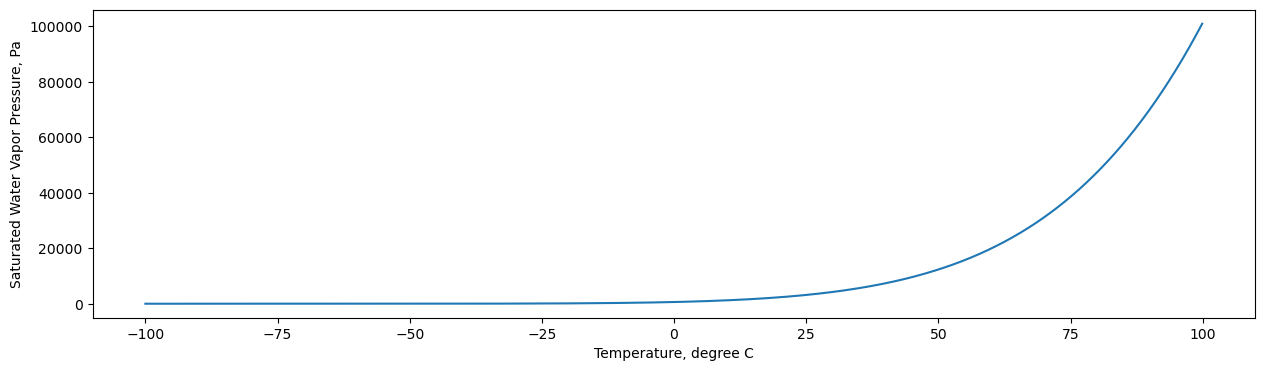

In [11]:
theta = [0.1 * x for x in range(-1000,1000)]

plt.figure(figsize=(15, 4))
svp_all = [svp._saturated_vapor_pressure_WMO(t+273.15)[0] for t in theta]
plt.plot(theta, svp_all)
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure, Pa')
plt.show()

### Example 4

Comparison of the differential value calculated by numerical method and mathematical method.

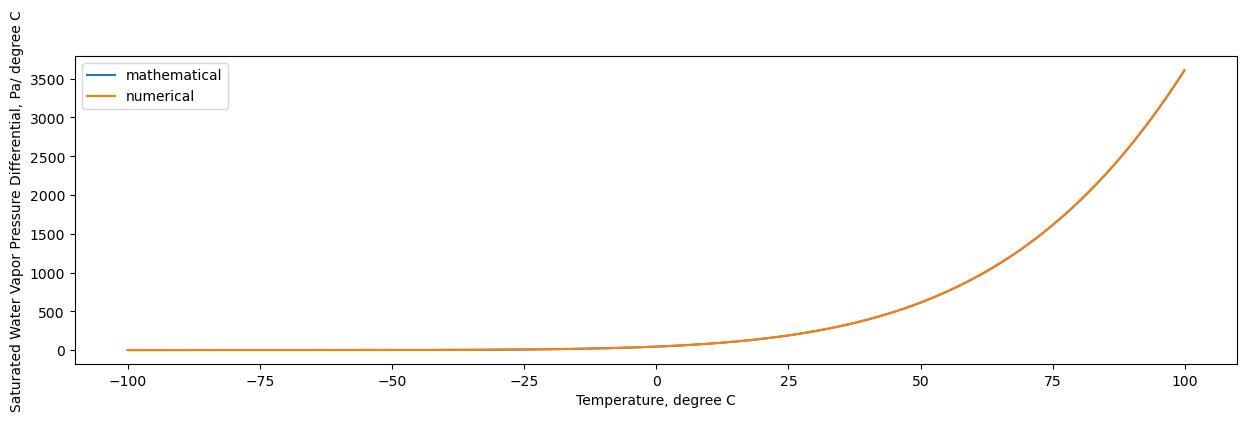

In [12]:
theta = [0.1 * x for x in range(-1000,1000)]

plt.figure(figsize=(15,4))
dsvp_dt_math = [svp._saturated_vapor_pressure_WMO(t+273.15)[1] for t in theta]
dsvp_dt_num = [(svp._saturated_vapor_pressure_WMO(t+273.25)[0] - svp._saturated_vapor_pressure_WMO(t+273.15)[0])/0.1 for t in theta]

plt.plot(theta, dsvp_dt_math, label='mathematical')
plt.plot(theta, dsvp_dt_num, label='numerical')
plt.legend()
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure Differential, Pa/ degree C')
plt.show()

The clear differece could not be shown.

## Wexler-Hyland (1983)

This equation is described in 機械工学会, SHASE and ASHRAE.

$$
k = a_1 \times 10^{b_1} \times \frac{1}{T} + a_2 \times 10^{b_2} + a_3 \times 10^{b_3} \times T + a_4 \times 10^{b_4} \times T^2 + a_5 \times 10^{b_5} \times T^3 + a_6 \times 10^{b_6} \times T^4 + a_7 \times 10^{b_7} \times \ln(T)
$$

$$
P_{vs} = e^k
$$

$$
\frac{dP_{vs}}{dT} = e^k \times \left( -a_1 \times 10^{b_1} \times \frac{1}{T^2} + a_3 \times 10^{b_3} + 2 \times a_4 \times 10^{b_4} \times T + 3 \times a_5 \times 10^{b_5} \times T^2 + 4 \times a_6 \times 10^{b_6} \times T^3 + a_7 \times 10^{b_7} \times \frac{1}{T} \right)
$$

Where  
$T$ is the absolute temperature (K);  
$P_{vs}$ is the saturated vapor pressure (Pa).

|       | $a_1$       | $b_1$ | $a_2$      | $b_2$ | $a_3$       | $b_3$ | $a_4$      | $b_4$ | $a_5$       | $b_5$ | $a_6$       | $b_6$ | $a_7$      | $b_7$ |
| :---: | :---:       | :---: | :---:      | :---: | :---:       | :---: | :---:      | :---: | :---:       | :---: | :---:       | :---: | :---:      | :---: |
| water | -0.58002206 | 4     | 0.13914993 | 1     | -0.48640239 | -1    | 0.41764768 | -4    | -0.14452093 | -7    |  0.0        |  0    | 0.65459673 | 1     |
| ice   | -0.56745359 | 4     | 0.63925247 | 1     | -0.96778430 | -2    | 0.62215701 | -6    |  0.20747825 | -8    | -0.94840240 | -12   | 0.41635019 | 1     |

### Example 1

Saturated vapor pressure of 0 degree C.

In [13]:
svp._saturated_vapor_pressure_WH('ice', 273.15)

(611.1535708907679, 50.32648528533754)

In [14]:
svp._saturated_vapor_pressure_WH('water', 273.15)

(611.2128674511848, 44.40174257890302)

Saturated vapor pressure of 100 degree C.

In [15]:
svp._saturated_vapor_pressure_WH('water', 373.15)

(101418.71682799164, 3619.6644205505136)

### Example 2

$$
\frac{dP}{dT} \bigg|_{t=273.15} \simeq \frac{P\mid_{t=274.15}-P \mid_{t=273.15}}{(274.15-273.15)}
$$

In [16]:
value0 = svp._saturated_vapor_pressure_WH('water', 273.15)
value1 = svp._saturated_vapor_pressure_WH('water', 274.15)
(value0[1], (value1[0] - value0[0] )/1.0)

(44.40174257890302, 45.85885053019683)

### Example 3

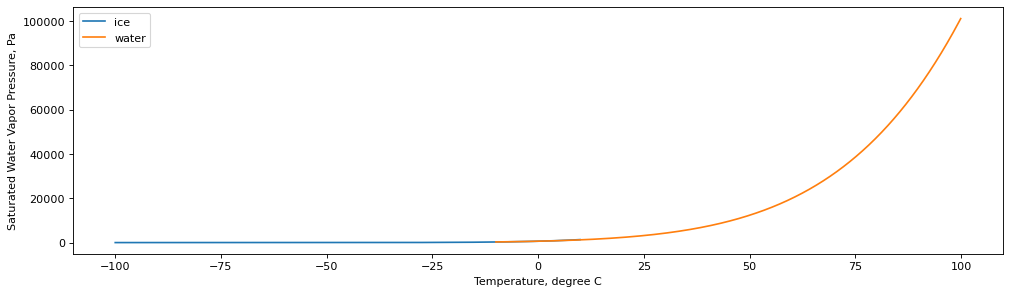

In [17]:
theta_ice = [0.1 * x for x in range(-1000, 100)]
theta_water = [0.1 * x for x in range(-100,1000)]

plt.figure(figsize=(15, 4), dpi=80)
svp_ice = [svp._saturated_vapor_pressure_WH('ice',  t+273.15)[0] for t in theta_ice]
svp_water = [svp._saturated_vapor_pressure_WH('water', t+273.15)[0] for t in theta_water]
plt.plot(theta_ice,   svp_ice  , label = 'ice'  )
plt.plot(theta_water, svp_water, label = 'water')
plt.legend()
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure, Pa')
plt.show()

### Example 4

Comparison of the differential value calculated by numerical method and mathematical method.

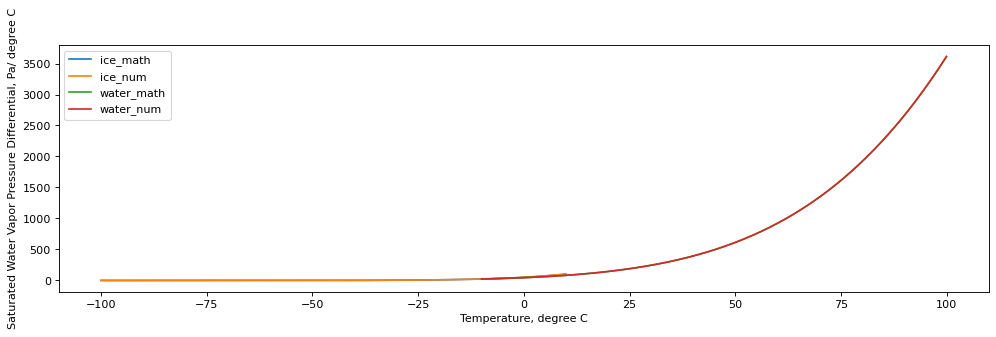

In [18]:
theta_ice = [0.1 * x for x in range(-1000, 100)]
theta_water = [0.1 * x for x in range( -100,1000)]

plt.figure(figsize = (15, 4), dpi=80)
dsvp_dt_ice = [svp._saturated_vapor_pressure_SONNTAG('ice', t+273.15)[1] for t in theta_ice]
dsvp_dt_ice_div = [(svp._saturated_vapor_pressure_SONNTAG('ice',  t+273.25)[0] - svp._saturated_vapor_pressure_SONNTAG('ice',  t+273.15)[0])/0.1 for t in theta_ice]
dsvp_dt_water = [svp._saturated_vapor_pressure_SONNTAG('water',t+273.15)[1] for t in theta_water]
dsvp_dt_water_div = [(svp._saturated_vapor_pressure_SONNTAG('water',t+273.25)[0] - svp._saturated_vapor_pressure_SONNTAG('water',t+273.15)[0])/0.1 for t in theta_water]

plt.plot(theta_ice, dsvp_dt_ice, label='ice_math')
plt.plot(theta_ice, dsvp_dt_ice_div, label='ice_num')
plt.plot(theta_water, dsvp_dt_water, label='water_math')
plt.plot(theta_water, dsvp_dt_water_div, label='water_num')
plt.legend()

plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure Differential, Pa/ degree C')
plt.show()

The clear differece could not be shown.

##  Tetens (1930)

$$
P_{vs} = 6.1078 \times 10^2 \times e^{ \left( a \frac{T-273.16}{T-b} \right) }
$$

$$
\frac{dP_{vs}}{dT} = 6.1078 \times 10^2 \times e^{ \left( a \frac{T-273.16}{T-b} \right) } \times \left( \frac{a}{T-b} - a \frac{T-273.16}{(T-b)^2}  \right)
$$

Where  
$ T $ is the absolute temperature (K);   
$ P_{vs} $ is the saturated vapor pressure (Pa).

| | $a$ | $b$ |
| :---: | :---: | :---: |
| water | 17.2693882 | 35.86 |
| ice | 21.8745584 | 7.66 |

### Reference

- Tetens, O., 1930: uber einige meteorologische Begriffe, Z. Geophys., 6, 297-309

↑ 未確認

### Example 1

Saturated vapor pressure of 0 degree C.

In [19]:
svp._saturated_vapor_pressure_tetens('ice',273.15) 

(610.2769663563716, 50.284537900398256)

In [20]:
svp._saturated_vapor_pressure_tetens('water',273.15)

(610.3356509064453, 44.420613912187754)

Saturated vapor pressure of 100 degree C.

In [21]:
svp._saturated_vapor_pressure_tetens('water', 373.15)

(102157.02724929823, 3679.899907828715)

### Example 2

$$
\frac{dP}{dT} \bigg|_{t=273.15} \simeq \frac{P\mid_{t=274.15}-P \mid_{t=273.15}}{(274.15-273.15)}
$$

In [22]:
value0 = svp._saturated_vapor_pressure_tetens('water', 273.15)
value1 = svp._saturated_vapor_pressure_tetens('water', 274.15)
(value0[1], (value1[0] - value0[0])/1.0)

(44.420613912187754, 45.87657754668339)

### Example 3

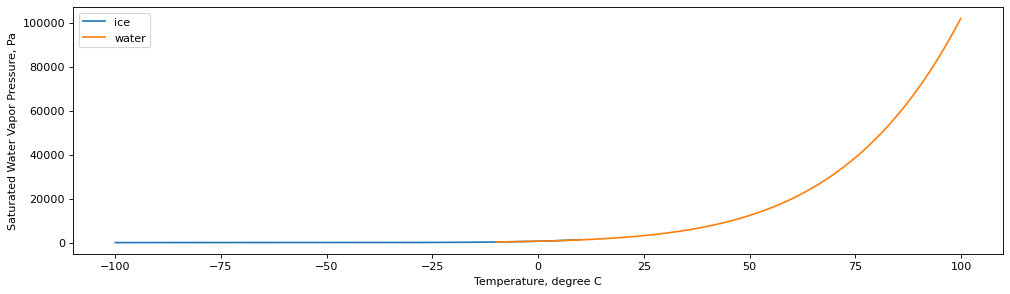

In [23]:
theta_ice = [0.1 * x for x in range(-1000, 100)]
theta_water = [0.1 * x for x in range( -100,1000)]

plt.figure(figsize=(15, 4), dpi=80)
svp_ice = [svp._saturated_vapor_pressure_tetens('ice', t+273.15)[0] for t in theta_ice]
svp_water = [svp._saturated_vapor_pressure_tetens('water',t+273.15)[0] for t in theta_water]
plt.plot(theta_ice, svp_ice, label='ice')
plt.plot(theta_water, svp_water, label='water')
plt.legend()
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure, Pa')
plt.show()

### Example 4

Comparison of the differential value calculated by numerical method and mathematical method.

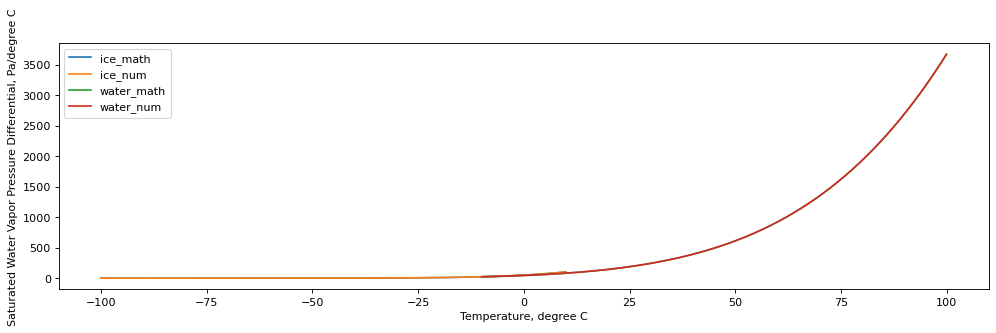

In [24]:
theta_ice = [0.1 * x for x in range(-1000, 100)]
theta_water = [0.1 * x for x in range( -100,1000)]

plt.figure(figsize=(15, 4), dpi=80)
dsvp_dt_ice = [svp._saturated_vapor_pressure_tetens('ice', t+273.15)[1] for t in theta_ice]
dsvp_dt_ice_div = [(svp._saturated_vapor_pressure_tetens('ice', t+273.25)[0] - svp._saturated_vapor_pressure_tetens('ice', t+273.15)[0])/0.1 for t in theta_ice]
dsvp_dt_water = [svp._saturated_vapor_pressure_tetens('water', t+273.15)[1] for t in theta_water]
dsvp_dt_water_div = [(svp._saturated_vapor_pressure_tetens('water', t+273.25)[0] - svp._saturated_vapor_pressure_tetens('water', t+273.15)[0])/0.1 for t in theta_water]

plt.plot(theta_ice, dsvp_dt_ice, label='ice_math')
plt.plot(theta_ice, dsvp_dt_ice_div, label='ice_num')
plt.plot(theta_water, dsvp_dt_water, label='water_math')
plt.plot(theta_water, dsvp_dt_water_div, label='water_num')
plt.legend()
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure Differential, Pa/degree C')
plt.show()

The clear differece could not be shown.

## Briggs an Sacket (1989)

$$
k = \frac{a_1}{T} + a_2 + a_3 \times \ln(T) + a_4 \times T + a_5 \times T^2 - \ln(10)
$$

$$
P_{vs} = e^k
$$

$$
\frac{dP_{vs}}{dT} = e_k \times \left( - \frac{a_1}{T^2} + \frac{a_3}{T} + a_4 + 2 \times a_5 \times T \right)
$$

Where  
$ T $ is the absolute temperature (K);   
$ P_{vs} $ is the saturated vapor pressure (Pa).

| | $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ |
| :---: | :---: | :---: | :---: | :---: | :---: |
| water | -2313.0338 | -164.03307  | 38.053682 | -0.13844344 | 0.000074465367 |
| ice   | -5631.1206 |   -8.363602 |  8.2312   | -0.03861449 | 0.0000277494   |

### Example 1

Saturated vapor pressure of 0 degree C.

In [25]:
svp._saturated_vapor_pressure_BS('ice',273.15)

(613.0158174136862, 50.36078539721189)

In [26]:
svp._saturated_vapor_pressure_BS('water',273.15)

(613.027145489425, 44.47664967709252)

Saturated vapor pressure of 100 degree C.

In [27]:
svp._saturated_vapor_pressure_BS('water', 373.15)

(101447.18110316222, 3623.833971539886)

### Example 2

$$
\frac{dP}{dT} \bigg|_{t=273.15} \simeq \frac{P\mid_{t=274.15}-P \mid_{t=273.15}}{(274.15-273.15)}
$$

In [28]:
value0 = svp._saturated_vapor_pressure_BS('water',273.15)
value1 = svp._saturated_vapor_pressure_BS('water',274.15)
(value0[1], (value1[0] - value0[0])/1.0)

(44.47664967709252, 45.93672266537976)

### Example 3

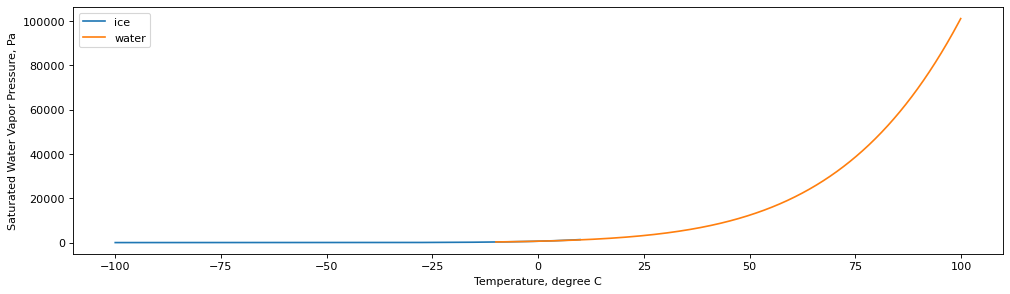

In [29]:
theta_ice = [0.1 * x for x in range(-1000, 100)]
theta_water = [0.1 * x for x in range( -100,1000)]

plt.figure(figsize=(15, 4), dpi=80)
svp_ice = [svp._saturated_vapor_pressure_BS('ice', t+273.15)[0] for t in theta_ice]
svp_water = [svp._saturated_vapor_pressure_BS('water', t+273.15)[0] for t in theta_water]
plt.plot(theta_ice, svp_ice, label='ice')
plt.plot(theta_water, svp_water, label='water')
plt.legend()
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure, Pa')
plt.show()

### Example 4

Comparison of the differential value calculated by numerical method and mathematical method.

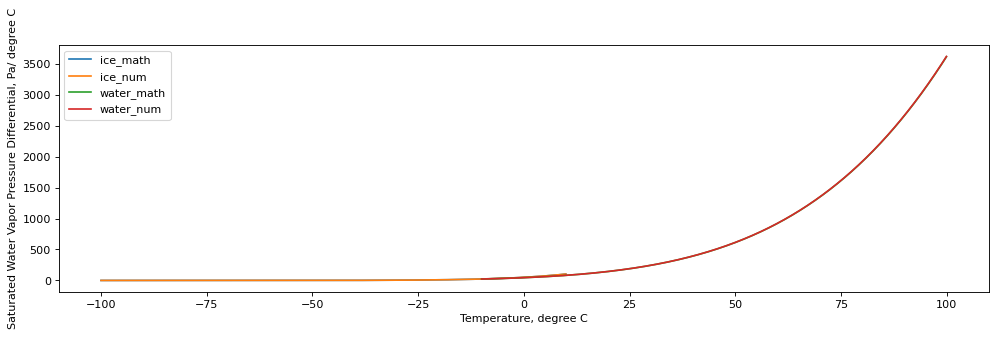

In [30]:
theta_ice = [0.1 * x for x in range(-1000, 100)]
theta_water = [0.1 * x for x in range(-100,1000)]

plt.figure(figsize=(15, 4), dpi=80)
dsvp_dt_ice       = [ svp._saturated_vapor_pressure_BS('ice',  t+273.15)[1] for t in theta_ice   ]
dsvp_dt_ice_div   = [ (svp._saturated_vapor_pressure_BS('ice',  t+273.25)[0] - svp._saturated_vapor_pressure_BS('ice',  t+273.15)[0])/0.1 for t in theta_ice   ]
dsvp_dt_water     = [ svp._saturated_vapor_pressure_BS('water',t+273.15)[1] for t in theta_water ]
dsvp_dt_water_div = [ (svp._saturated_vapor_pressure_BS('water',t+273.25)[0] - svp._saturated_vapor_pressure_BS('water',t+273.15)[0])/0.1 for t in theta_water ]

plt.plot(theta_ice,   dsvp_dt_ice  ,     label = 'ice_math'  )
plt.plot(theta_ice,   dsvp_dt_ice_div,   label = 'ice_num'  )
plt.plot(theta_water,   dsvp_dt_water,     label = 'water_math')
plt.plot(theta_water,   dsvp_dt_water_div, label = 'water_num')
plt.legend()
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure Differential, Pa/ degree C')
plt.show()

The clear differece could not be shown.

## 2.6 Antoine

$$
k = A - \left( \frac{B}{T+C} \right)
$$

$$
p_{vs} = 10^k
$$

$$
\frac{dP_{vs}}{dT} = 10^k \times \log 10 \times \left( \frac{B}{(T+C)^2} \right)
$$

Where  
$ T $ is the absolute temperature (K);   
$ P_{vs} $ is the saturated vapor pressure (mmHg).

The coefficiecnts in Ooe, 1976 are,  
$ A = 8.02754 $;  
$ B = 1705.616 $;  
$ C = 231.405 - 273.15 $.  
Ooe 1976: Shuzo Ooe, 電子計算機による蒸気圧データ, 1976

(参考)  
- Stull, D.R., Vapor Pressure of Pure Substances Organic Compounds, Ind. Eng. Chem., 1947, 39, 517-540

### Example 1

Saturated vapor pressure of 0 degree C.

In [31]:
svp._saturated_vapor_pressure_antoine(273.15) 

(604.987807177887, 44.370885402709014)

Saturated vapor pressure of 100 degree C.

In [32]:
svp._saturated_vapor_pressure_antoine(373.15) 

(101349.54807197973, 3624.104013521203)

### Example 2

$$
\frac{dP}{dT} \bigg|_{t=273.15} \simeq \frac{P\mid_{t=274.15}-P \mid_{t=273.15}}{(274.15-273.15)}
$$

In [33]:
value0 = svp._saturated_vapor_pressure_antoine(273.15)
value1 = svp._saturated_vapor_pressure_antoine(274.15)

( value0[1], ( value1[0] - value0[0] )/1.0 )

(44.370885402709014, 45.83310734214649)

### Example 3

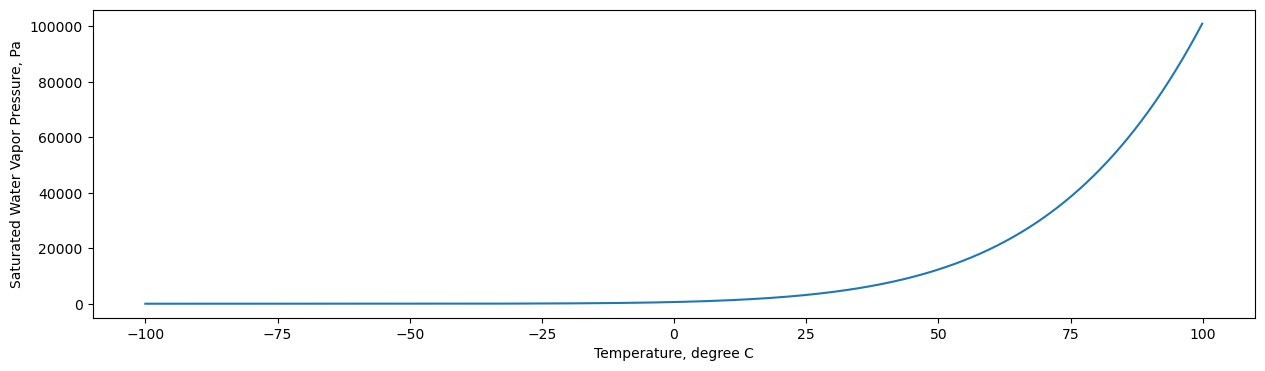

In [34]:
theta = [0.1 * x for x in range(-1000,1000)]

plt.figure(figsize=(15,4))
svp_all = [svp._saturated_vapor_pressure_antoine(t+273.15)[0] for t in theta]
plt.plot(theta, svp_all)
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure, Pa')
plt.show()

### Example 4

Comparison of the differential value calculated by numerical method and mathematical method.

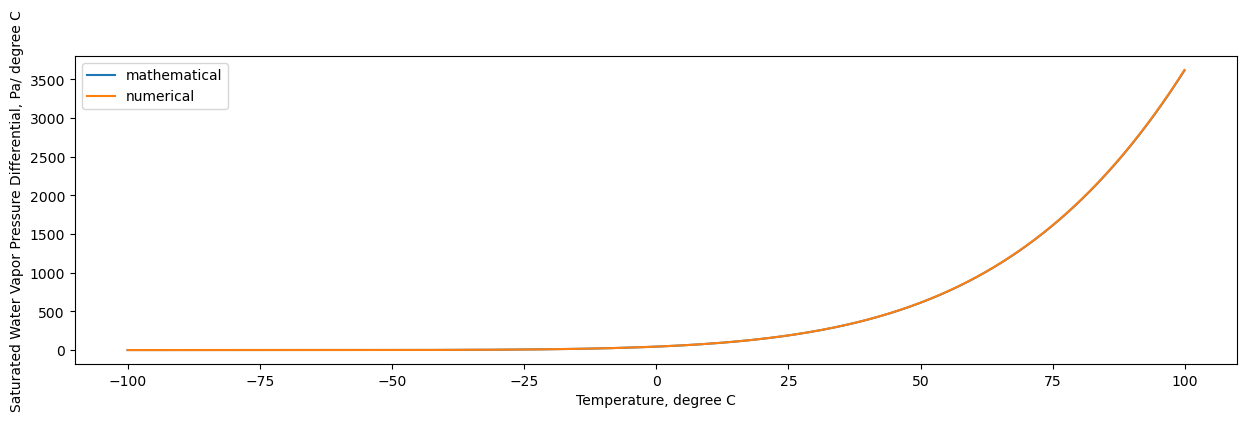

In [35]:
theta = [0.1 * x for x in range(-1000,1000)]

plt.figure(figsize=(15,4))
dsvp_dt_math = [svp._saturated_vapor_pressure_antoine(t+273.15)[1] for t in theta]
dsvp_dt_num = [(svp._saturated_vapor_pressure_antoine(t+273.25)[0] - svp._saturated_vapor_pressure_antoine(t+273.15)[0] )/0.1 for t in theta]

plt.plot(theta, dsvp_dt_math, label='mathematical')
plt.plot(theta, dsvp_dt_num,  label='numerical')
plt.legend()
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure Differential, Pa/ degree C')
plt.show()

The clear differece could not be shown.

## Goff Gratch

$$
k_{water} = a_1 \left( \frac{T_{st}}{T} - 1 \right) + a_2 \log_{10} \left( \frac{T_{st}}{T} \right) + a_3  \left( 10^{ a_4 \left(1- \frac{T}{T_{st}} \right) } - 1 \right) + a_5 \left( 10^{ a_6 \left( \frac{T_{st}}{T} - 1 \right) } - 1 \right) + \log_{10} e_{st}^*
$$

$$
P_{vs} = 10^{k_{water}} \text{  over water}
$$

$$
\frac{dP_{vs}}{dT} = 10^{k_{water}} \times \log 10 \times \left( - a_1 \left( \frac{T_{st}}{T^2} \right) - \frac{a_2}{T \log 10} - a_3 \times \log(10) \times 10^{a_4 \left(1- \frac{T}{T_{st}} \right) } \times \frac{a_4}{T_{st}} - a_5 \times \log(10) \times 10^{ a_6 \left( \frac{T_{st}}{T} - 1 \right) } \times a_6 \times \frac{T_{st}}{T^2}                   \right)
$$

$$
\begin{array}{}
a_1 &= -7.90298 \\
a_2 &= 5.02808 \\
a_3 &= - 1.3816 \times 10^{-7} \\
a_4 &= 11.344 \\
a_5 &= 8.1328 \times 10^{-3} \\
a_6 &= -3.49149
\end{array}
$$

$$
k_{ice} = b_1 \left( \frac{T_0}{T} - 1 \right) + b_2 \log_{10} \left( \frac{T_0}{T} \right) + b_3 \left( 1 - \frac{T}{T_0} \right) + \log_{10} e^*_{i0}
$$

$$
P_{vs} = 10^{k_{ice}} \text{  over ice}
$$

$$
\frac{dP_{vs}}{dT} = 10^{k_{ice}} \times \log(10) \times \left( - b_1 \times \frac{T_0}{T^2} - \frac{b_2}{\log(10) \times T} - \frac{b_3}{T_0} \right)
$$

$$
\begin{array}{}
b_1 &= -9.09718 \\
b_2 &= -3.56654 \\
b_3 &= 0.876793 \\
\end{array}
$$

Where  
$P_{vs}$ is the saturated water vapor pressure (hPa);  
$T$ is the absolute air temperature (K);  
$T_{st}$ is the steam-point (i.e. boiling point at 1 atm.) temperature (373.15 K);  
$e^*_{st}$ is the saturated water vapor pressure at the steam-point pressure (1 atm = 1013.25 hPa);  
$T_0$ is the ice-point (triple point) temperature (273.16 K);  
$e^*_{i0}$ is the saturated water vapor pressure at the ice-point pressure (6.1173 hPa).

### Reference

- Goff, J. A., and S. Gratch, Low-pressure properties of water from -160 to 212 F, in Transactions of the American society of heating and ventilating engineers, pp.95-122, presented at the 52nd annual meeting of the American society of heating and ventilating engineers, New York, 1946

### Example 1

Saturated vapor pressure of 0 degree C.

In [36]:
svp._saturated_vapor_pressure_GoffGratch('ice',273.15)

(611.2264301073889, 50.33811899583799)

In [37]:
svp._saturated_vapor_pressure_GoffGratch('water',273.15)

(610.6632501882182, 44.374468059838875)

Saturated vapor pressure of 100 degree C.

In [38]:
svp._saturated_vapor_pressure_GoffGratch('water', 373.15)

(101324.99999999996, 3616.8429931247674)

### Example 2

$$
\frac{dP}{dT} \bigg|_{t=273.15} \simeq \frac{P\mid_{t=274.15}-P \mid_{t=273.15}}{(274.15-273.15)}
$$

In [39]:
value0 = svp._saturated_vapor_pressure_GoffGratch('water',273.15)
value1 = svp._saturated_vapor_pressure_GoffGratch('water',274.15)
value0[1], (value1[0] - value0[0])/1.0

(44.374468059838875, 45.83048282656739)

### Example 3

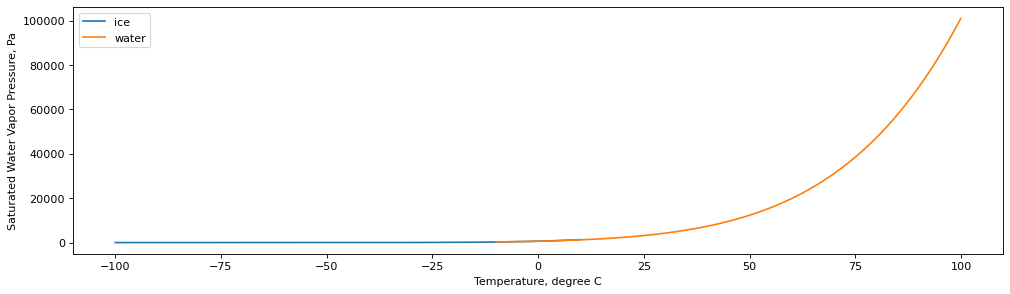

In [40]:
theta_ice   = [ 0.1 * x for x in range(-1000, 100) ]
theta_water = [ 0.1 * x for x in range( -100,1000) ]

plt.figure( figsize = ( 15, 4 ), dpi=80 )
svp_ice   = [ svp._saturated_vapor_pressure_GoffGratch('ice',  t+273.15)[0] for t in theta_ice   ]
svp_water = [ svp._saturated_vapor_pressure_GoffGratch('water',t+273.15)[0] for t in theta_water ]
plt.plot(theta_ice,   svp_ice  , label = 'ice'  )
plt.plot(theta_water, svp_water, label = 'water')
plt.legend()
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure, Pa')
plt.show()

### Example 4

Comparison of the differential value calculated by numerical method and mathematical method.

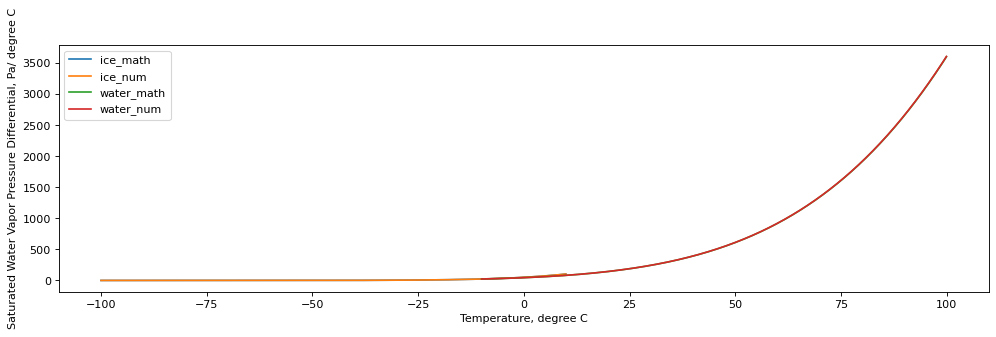

In [41]:
theta_ice   = [ 0.1 * x for x in range(-1000, 100) ]
theta_water = [ 0.1 * x for x in range( -100,1000) ]

plt.figure( figsize = ( 15, 4 ), dpi=80 )
dsvp_dt_ice       = [ svp._saturated_vapor_pressure_GoffGratch('ice',  t+273.15)[1] for t in theta_ice   ]
dsvp_dt_ice_div   = [ (svp._saturated_vapor_pressure_GoffGratch('ice',  t+273.25)[0] - svp._saturated_vapor_pressure_GoffGratch('ice',  t+273.15)[0])/0.1 for t in theta_ice   ]
dsvp_dt_water     = [ svp._saturated_vapor_pressure_GoffGratch('water',t+273.15)[1] for t in theta_water ]
dsvp_dt_water_div = [ (svp._saturated_vapor_pressure_GoffGratch('water',t+273.25)[0] - svp._saturated_vapor_pressure_GoffGratch('water',t+273.15)[0])/0.1 for t in theta_water ]

plt.plot(theta_ice,   dsvp_dt_ice  ,     label = 'ice_math'  )
plt.plot(theta_ice,   dsvp_dt_ice_div,   label = 'ice_num'  )
plt.plot(theta_water,   dsvp_dt_water,     label = 'water_math')
plt.plot(theta_water,   dsvp_dt_water_div, label = 'water_num')
plt.legend()
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Water Vapor Pressure Differential, Pa/ degree C')
plt.show()

The clear differece could not be shown.

# Comparison of functions

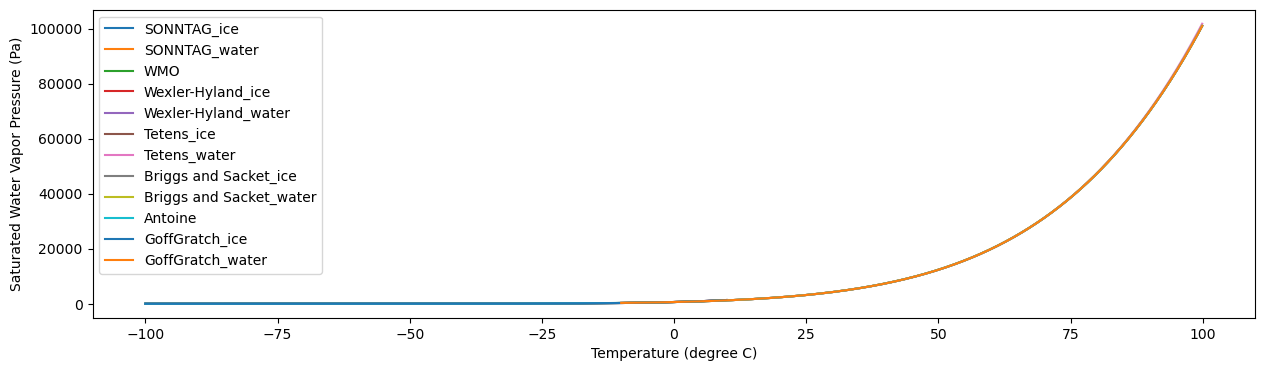

In [42]:
theta_ice   = [ 0.1 * x for x in range(-1000, 100) ]
theta_water = [ 0.1 * x for x in range( -100,1000) ]
theta_all   = [ 0.1 * x for x in range(-1000,1000) ]

plt.figure( figsize = (15,4) )
plt.plot(theta_ice,   [svp._saturated_vapor_pressure_SONNTAG('ice',      t+273.15)[0] for t in theta_ice   ], label = 'SONNTAG_ice'             )
plt.plot(theta_water, [svp._saturated_vapor_pressure_SONNTAG('water',    t+273.15)[0] for t in theta_water ], label = 'SONNTAG_water'           )
plt.plot(theta_all,   [svp._saturated_vapor_pressure_WMO(                t+273.15)[0] for t in theta_all   ], label = 'WMO'                     )
plt.plot(theta_ice,   [svp._saturated_vapor_pressure_WH('ice',           t+273.15)[0] for t in theta_ice   ], label = 'Wexler-Hyland_ice'       )
plt.plot(theta_water, [svp._saturated_vapor_pressure_WH('water',         t+273.15)[0] for t in theta_water ], label = 'Wexler-Hyland_water'     )
plt.plot(theta_ice,   [svp._saturated_vapor_pressure_tetens('ice',       t+273.15)[0] for t in theta_ice   ], label = 'Tetens_ice'              )
plt.plot(theta_water, [svp._saturated_vapor_pressure_tetens('water',     t+273.15)[0] for t in theta_water ], label = 'Tetens_water'            )
plt.plot(theta_ice,   [svp._saturated_vapor_pressure_BS('ice',           t+273.15)[0] for t in theta_ice   ], label = 'Briggs and Sacket_ice'   )
plt.plot(theta_water, [svp._saturated_vapor_pressure_BS('water',         t+273.15)[0] for t in theta_water ], label = 'Briggs and Sacket_water' )
plt.plot(theta_all,   [svp._saturated_vapor_pressure_antoine(            t+273.15)[0] for t in theta_all   ], label = 'Antoine'                 )
plt.plot(theta_ice,   [svp._saturated_vapor_pressure_GoffGratch('ice',   t+273.15)[0] for t in theta_ice   ], label = 'GoffGratch_ice'          )
plt.plot(theta_water, [svp._saturated_vapor_pressure_GoffGratch('water', t+273.15)[0] for t in theta_water ], label = 'GoffGratch_water'        )

plt.legend()
plt.xlabel('Temperature (degree C)')
plt.ylabel('Saturated Water Vapor Pressure (Pa)')
plt.show()

The ratio of the difference for the result calculated by the SONNTAG equation.

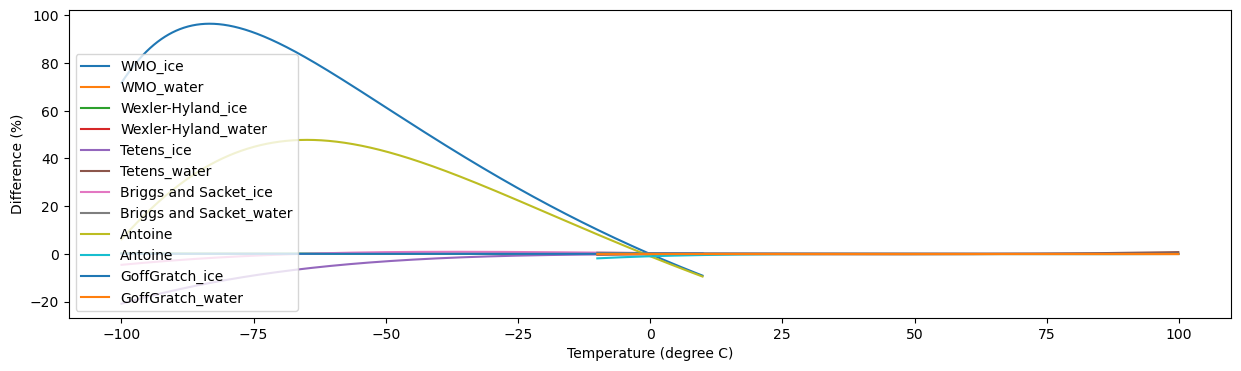

In [43]:
theta_ice   = [ 0.1 * x for x in range(-1000, 100) ]
theta_water = [ 0.1 * x for x in range( -100,1000) ]
theta_all   = [ 0.1 * x for x in range(-1000,1000) ]

plt.figure( figsize = (15,4) )
plt.plot(theta_ice,   [ (svp._saturated_vapor_pressure_WMO(                t+273.15)[0] - svp._saturated_vapor_pressure_SONNTAG('ice',   t+273.15)[0] ) / svp._saturated_vapor_pressure_SONNTAG('ice',   t+273.15)[0] * 100 for t in theta_ice   ], label = 'WMO_ice'                 )
plt.plot(theta_water, [ (svp._saturated_vapor_pressure_WMO(                t+273.15)[0] - svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[0] ) / svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[0] * 100 for t in theta_water ], label = 'WMO_water'               )
plt.plot(theta_ice,   [ (svp._saturated_vapor_pressure_WH('ice',           t+273.15)[0] - svp._saturated_vapor_pressure_SONNTAG('ice',   t+273.15)[0] ) / svp._saturated_vapor_pressure_SONNTAG('ice',   t+273.15)[0] * 100 for t in theta_ice   ], label = 'Wexler-Hyland_ice'       )
plt.plot(theta_water, [ (svp._saturated_vapor_pressure_WH('water',         t+273.15)[0] - svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[0] ) / svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[0] * 100 for t in theta_water ], label = 'Wexler-Hyland_water'     )
plt.plot(theta_ice,   [ (svp._saturated_vapor_pressure_tetens('ice',       t+273.15)[0] - svp._saturated_vapor_pressure_SONNTAG('ice',   t+273.15)[0] ) / svp._saturated_vapor_pressure_SONNTAG('ice',   t+273.15)[0] * 100 for t in theta_ice   ], label = 'Tetens_ice'              )
plt.plot(theta_water, [ (svp._saturated_vapor_pressure_tetens('water',     t+273.15)[0] - svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[0] ) / svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[0] * 100 for t in theta_water ], label = 'Tetens_water'            )
plt.plot(theta_ice,   [ (svp._saturated_vapor_pressure_BS('ice',           t+273.15)[0] - svp._saturated_vapor_pressure_SONNTAG('ice',   t+273.15)[0] ) / svp._saturated_vapor_pressure_SONNTAG('ice',   t+273.15)[0] * 100 for t in theta_ice   ], label = 'Briggs and Sacket_ice'   )
plt.plot(theta_water, [ (svp._saturated_vapor_pressure_BS('water',         t+273.15)[0] - svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[0] ) / svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[0] * 100 for t in theta_water ], label = 'Briggs and Sacket_water' )
plt.plot(theta_ice,   [ (svp._saturated_vapor_pressure_antoine(            t+273.15)[0] - svp._saturated_vapor_pressure_SONNTAG('ice',   t+273.15)[0] ) / svp._saturated_vapor_pressure_SONNTAG('ice',   t+273.15)[0] * 100 for t in theta_ice   ], label = 'Antoine'                 )
plt.plot(theta_water, [ (svp._saturated_vapor_pressure_antoine(            t+273.15)[0] - svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[0] ) / svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[0] * 100 for t in theta_water ], label = 'Antoine'                 )
plt.plot(theta_ice,   [ (svp._saturated_vapor_pressure_GoffGratch('ice',   t+273.15)[0] - svp._saturated_vapor_pressure_SONNTAG('ice',   t+273.15)[0] ) / svp._saturated_vapor_pressure_SONNTAG('ice',   t+273.15)[0] * 100 for t in theta_ice   ], label = 'GoffGratch_ice'          )
plt.plot(theta_water, [ (svp._saturated_vapor_pressure_GoffGratch('water', t+273.15)[0] - svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[0] ) / svp._saturated_vapor_pressure_SONNTAG('water', t+273.15)[0] * 100 for t in theta_water ], label = 'GoffGratch_water'        )

plt.legend()
plt.xlabel('Temperature (degree C)')
plt.ylabel('Difference (%)')
plt.show()

# Integrated Equation

## Saturated Vapor Pressure

In [44]:
def get_saturated_vapor_pressure(equation: str, status: str, t: float) -> float:
    """calculate the saturated vapor pressure

    Args:
        equation: used equation name
        status: 'water' or 'ice'
        t: temperature, degree C

    Returns:
        saturated vapor pressure, Pa
    """
    
    return svp.svp(equation, status, t)

In case of the equation of WMO and Antoine, parameter 'status' is ignored.

### Example

In [45]:
get_saturated_vapor_pressure('SONNTAG', 'ice', 273.15)

611.1527097518417

In [46]:
get_saturated_vapor_pressure('SONNTAG', 'water', 273.15)

611.2128400464351

In [47]:
get_saturated_vapor_pressure('WMO', 'ice', 273.15)

610.6950957277759

In [48]:
get_saturated_vapor_pressure('WMO', 'water', 273.15)

610.6950957277759

In [49]:
get_saturated_vapor_pressure('WexlerHyland', 'ice', 273.15)

611.1535708907679

In [50]:
get_saturated_vapor_pressure('WexlerHyland', 'water', 273.15)

611.2128674511848

In [51]:
get_saturated_vapor_pressure('Tetens', 'ice', 273.15)

610.2769663563716

In [52]:
get_saturated_vapor_pressure('Tetens', 'water', 273.15)

610.3356509064453

In [53]:
get_saturated_vapor_pressure('BriggsSacket', 'ice', 273.15)

613.0158174136862

In [54]:
get_saturated_vapor_pressure('BriggsSacket', 'water', 273.15)

613.027145489425

In [55]:
get_saturated_vapor_pressure('Antoine', 'ice', 273.15)

604.987807177887

In [56]:
get_saturated_vapor_pressure('Antoine', 'water', 273.15)

604.987807177887

In [57]:
get_saturated_vapor_pressure('GoffGratch', 'ice', 273.15)

611.2264301073889

In [58]:
get_saturated_vapor_pressure('GoffGratch', 'water', 273.15)

610.6632501882182

## Differential of Saturated Vapor Pressure

In [59]:
def get_saturated_vapor_pressure_differential(equation: str, status: str, t: float) -> float:
    """calculate the saturated vapor pressure and its differential

    Args:
        equation: used equation name
        status: 'water' or 'ice'
        t: temperature, degree C

    Returns:
        differential of saturated vapor pressure, Pa/degree C
    """
    
    return svp.dsvp_dt(equation, status, t)

In case of the equation of WMO and Antoine, parameter 'status' is ignored.

### Example

In [60]:
get_saturated_vapor_pressure_differential('SONNTAG', 'ice', 273.15)

50.323158101166285

In [61]:
get_saturated_vapor_pressure_differential('SONNTAG', 'water', 273.15)

44.409707361678436

In [62]:
get_saturated_vapor_pressure_differential('WMO', 'ice', 273.15)

44.37624095308939

In [63]:
get_saturated_vapor_pressure_differential('WMO', 'water', 273.15)

44.37624095308939

In [64]:
get_saturated_vapor_pressure_differential('WexlerHyland', 'ice', 273.15)

50.32648528533754

In [65]:
get_saturated_vapor_pressure_differential('WexlerHyland', 'water', 273.15)

44.40174257890302

In [66]:
get_saturated_vapor_pressure_differential('Tetens', 'ice', 273.15)

50.284537900398256

In [67]:
get_saturated_vapor_pressure_differential('Tetens', 'water', 273.15)

44.420613912187754

In [68]:
get_saturated_vapor_pressure_differential('BriggsSacket', 'ice', 273.15)

50.36078539721189

In [69]:
get_saturated_vapor_pressure_differential('BriggsSacket', 'water', 273.15)

44.47664967709252

In [70]:
get_saturated_vapor_pressure_differential('Antoine', 'ice', 273.15)

44.370885402709014

In [71]:
get_saturated_vapor_pressure_differential('Antoine', 'water', 273.15)

44.370885402709014

In [72]:
get_saturated_vapor_pressure_differential('GoffGratch', 'ice', 273.15)

50.33811899583799

In [73]:
get_saturated_vapor_pressure_differential('GoffGratch', 'water', 273.15)

44.374468059838875